In [1]:
#install MlFlow

!pip install mlflow --quiet
!pip install pyngrok --quiet

     |████████████████████████████████| 17.9 MB 5.3 MB/s 
     |████████████████████████████████| 209 kB 47.6 MB/s 
     |████████████████████████████████| 79 kB 5.8 MB/s 
     |████████████████████████████████| 181 kB 54.1 MB/s 
     |████████████████████████████████| 146 kB 56.2 MB/s 
     |████████████████████████████████| 81 kB 7.4 MB/s 
     |████████████████████████████████| 596 kB 47.0 MB/s 
     |████████████████████████████████| 54 kB 2.1 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 78 kB 5.3 MB/s 
     |████████████████████████████████| 745 kB 5.2 MB/s 


In [2]:
!mlflow

Usage: mlflow [OPTIONS] COMMAND [ARGS]...

Options:
  --version  Show the version and exit.
  --help     Show this message and exit.

Commands:
  artifacts    Upload, list, and download...
  azureml      Serve models on Azure ML.
  db           Commands for managing an MLflow...
  deployments  Deploy MLflow models to custom...
  experiments  Manage experiments.
  gc           Permanently delete runs in the
               `deleted` lifecycle stage.

  models       Deploy MLflow models locally.
  pipelines    Run MLflow Pipelines and inspect...
  run          Run an MLflow project from the...
  runs         Manage runs.
  sagemaker    Serve models on SageMaker.
  server       Run the MLflow tracking server.
  ui           Launch the MLflow tracking UI
               for...


In [3]:
import mlflow
import mlflow.sklearn
from mlflow.tracking import MlflowClient

mlflow.set_experiment('ML-tracking')

2022/07/17 08:58:04 INFO mlflow.tracking.fluent: Experiment with name 'ML-tracking' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///content/mlruns/1', experiment_id='1', lifecycle_stage='active', name='ML-tracking', tags={}>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import io
import seaborn as sns

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
import mlflow
import mlflow.sklearn
import sys
import os

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
from google.colab import files
uploaded = files.upload()

Saving Energy_Data_2022.xlsx to Energy_Data_2022.xlsx


In [8]:
df = pd.read_excel('Energy_Data_2022.xlsx',engine='openpyxl')

In [9]:
df1 = df.loc[df['seriesDescription'] == 'Transportation Sector']
df2 = df.loc[df['seriesDescription'] == 'End-Use-Sectors']
df3 = df.loc[df['seriesDescription'] == 'Residential Sector']
df4 = df.loc[df['seriesDescription'] == 'Industrial Sector']
df5 = df.loc[df['seriesDescription'] == 'Commercial Sector']

df1 = df1[["period", "value"]]
df2 = df2[["period", "value"]]
df3 = df3[["period", "value"]]
df4 = df4[["period", "value"]]
df5 = df5[["period", "value"]]

In [10]:
df1.rename(columns = {'period':'ds', 'value':'y'}, inplace = True)
df2.rename(columns = {'period':'ds', 'value':'y'}, inplace = True)
df3.rename(columns = {'period':'ds', 'value':'y'}, inplace = True)
df4.rename(columns = {'period':'ds', 'value':'y'}, inplace = True)
df5.rename(columns = {'period':'ds', 'value':'y'}, inplace = True)

In [11]:
!pip install auto_ts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 5.1 MB/s 
     |████████████████████████████████| 1.4 MB 31.2 MB/s 
     |████████████████████████████████| 1.1 MB 40.2 MB/s 
     |████████████████████████████████| 192.9 MB 74 kB/s 
     |████████████████████████████████| 140 kB 60.3 MB/s 
     |████████████████████████████████| 9.8 MB 45.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90
  Attempting uninstall: dask
    Found existing installation: dask 2.12.0
    Uninstalling dask-2.12.0:
      Successfully uninstalled dask-2.12.0


In [12]:
!pip install distributed==2022.01.0
from auto_ts import auto_timeseries

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 822 kB 5.0 MB/s 
     |████████████████████████████████| 1.0 MB 35.1 MB/s 
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 1.3.0
    Uninstalling cloudpickle-1.3.0:
      Successfully uninstalled cloudpickle-1.3.0
  Attempting uninstall: dask
    Found existing installation: dask 2022.2.0
    Uninstalling dask-2022.2.0:
      Successfully uninstalled dask-2022.2.0
  Attempting uninstall: distributed
    Found existing installation: distributed 1.25.3
    Uninstalling distributed-1.25.3:
      Successfully uninstalled distributed-1.25.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gym 0.17.3 requires cloudpickle<1.7.0,>=1.2.0, but you have cloudpickle 2.1.0 which is incompatible.


Imported auto_timeseries version:0.0.64. Call by using:
model = auto_timeseries(score_type='rmse',
        time_interval='M', non_seasonal_pdq=None, seasonality=False,
        seasonal_period=12, model_type=['best'], verbose=2, dask_xgboost_flag=0)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

In [14]:
def eval_metrics(actual, pred):
        rmse = np.sqrt(mean_squared_error(actual, pred))
        mae = mean_absolute_error(actual, pred)
        r2 = r2_score(actual, pred)
        mape = mean_absolute_percentage_error(actual, pred)
        return rmse, mae, r2, mape

In [15]:
def model_fit(data, run_name,time_interval,model_type):
  data['ds'] = pd.to_datetime(data.ds)
  data['ds'] = data['ds'].dt.strftime('%d-%b-%Y')

 
  train_df, test_df = train_test_split(data[:], test_size=12, random_state=0, shuffle=False)
  train_df.count()
  test_df.count()
  with mlflow.start_run(run_name = run_name):
    model = auto_timeseries(score_type='rmse', 
                            time_interval= 'BM', 
                            non_seasonal_pdq=None, 
                            seasonality=True, 
                            seasonal_period=12, 
                            model_type=['prophet', 'stats', 'ARIMA', 'SARIMAX','ML'], 
                            forecast_period=12,
                            verbose=2)
    model.fit(traindata=train_df, 
              ts_column='ds', 
              target='y',
              cv=2)
    print(test_df['y'])
    predicted = model.predict(testdata=test_df)
    (rmse, mae, r2, mape) = eval_metrics(test_df['y'], predicted['yhat'])
    print("rmse",rmse)
    print("mape", mape)
    print("mae", mae)
    mlflow.log_param("time_interval", time_interval)
    mlflow.log_param("model_type", model_type)
    
    mlflow.log_metric("mape", mape)
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("mae", mae)
    print("model cv scores", model.get_cv_scores)

    mlflow.sklearn.log_model(model, "model")

    print(model.get_leaderboard())

Start of Fit.....
    Target variable given as = y
Start of loading of data.....
    Inputs: ts_column = ds, sep = ,, target = ['y']
    Using given input: pandas dataframe...
    ds column exists in given train data...
    train data shape = (578, 1)
    detected strf_time_format as %d-%b-%Y in train data. You can change it in setup if this is incorrect.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Data is stationary after one differencing
There is 1 differencing needed in this datasets for VAR model


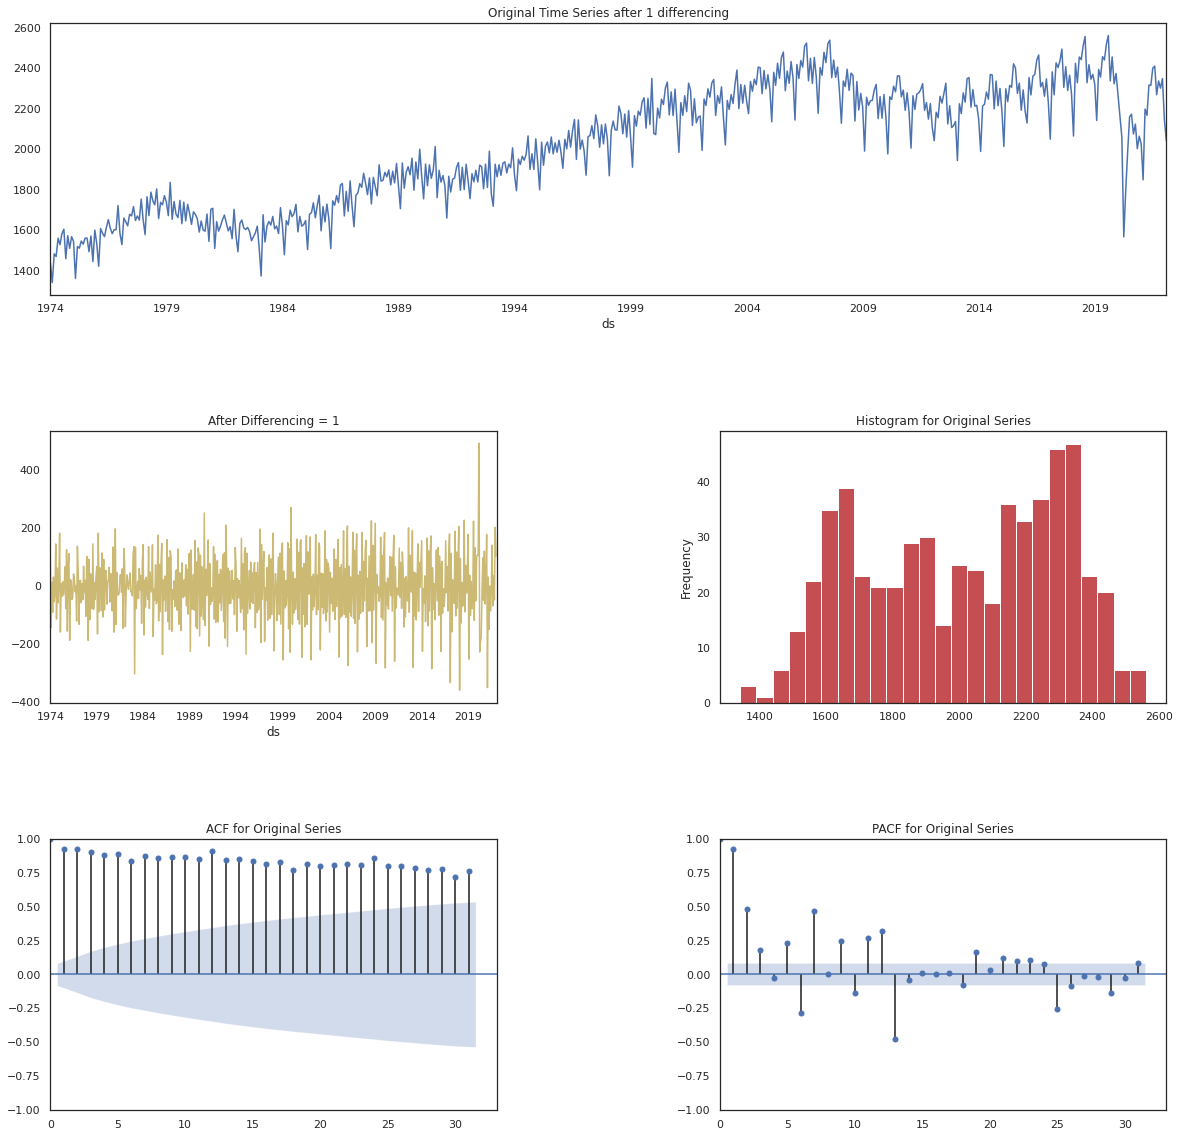

Time Interval is given as BM
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
    Fit-Predict data (shape=(578, 2)) with Confidence Interval = 0.95...
  Starting Prophet Fit
       Adding monthly seasonality to Prophet with period=12, fourier_order=12 and prior_scale=0.10
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 2

Fold Number: 1 --> Train Shape: 554 Test Shape: 12
    RMSE = 734.91
    Std Deviation of actuals = 61.39
    Normalized RMSE (as pct of std dev) = 1197%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 566 Test Shape: 12
    RMSE = 743.29
    Std Deviation of actuals = 72.09
    Normalized RMSE (as pct of std dev) = 1031%
Cross Validation window: 2 completed

-------------------------------------------
Model Cross Validation Results:
-------------------------------------------
    MAE (Mean Absolute Error = 736.40
 

2022/07/17 10:11:47 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmppkoavtxz/model/model.pkl, flavor: sklearn), fall back to return ['scikit-learn==1.0.2', 'cloudpickle==2.1.0']. Set logging level to DEBUG to see the full traceback.


           name        rmse
1  auto_SARIMAX   34.986183
3            ML  458.128498
0       Prophet  739.102259
2           VAR         inf


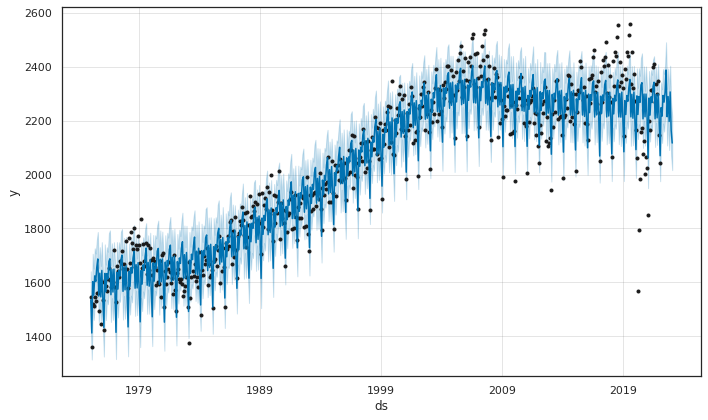

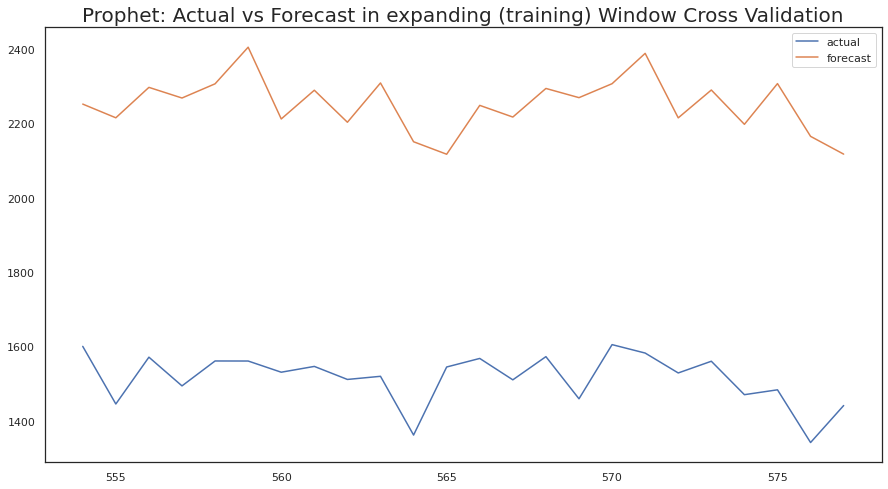

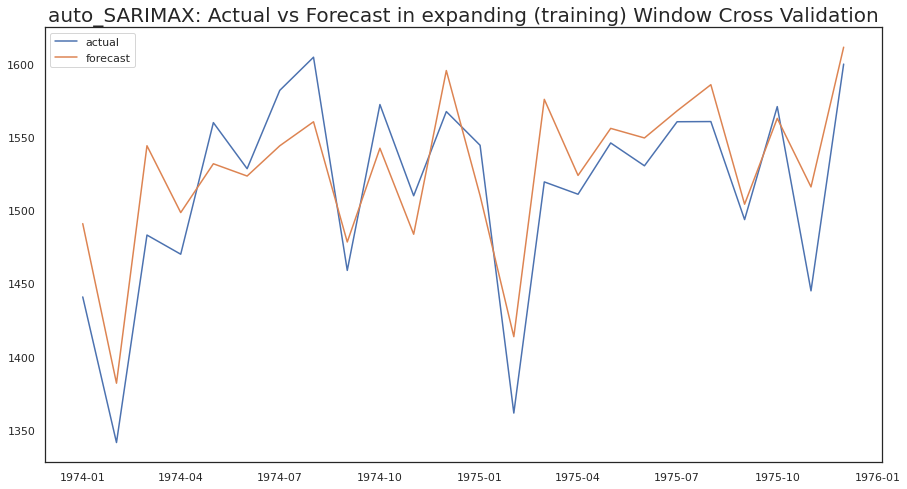

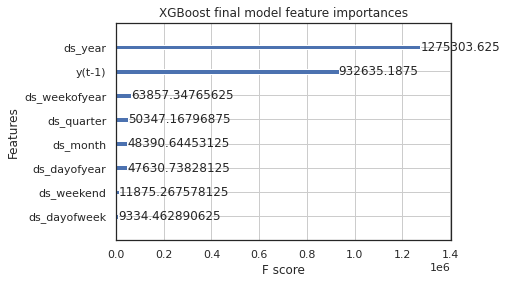

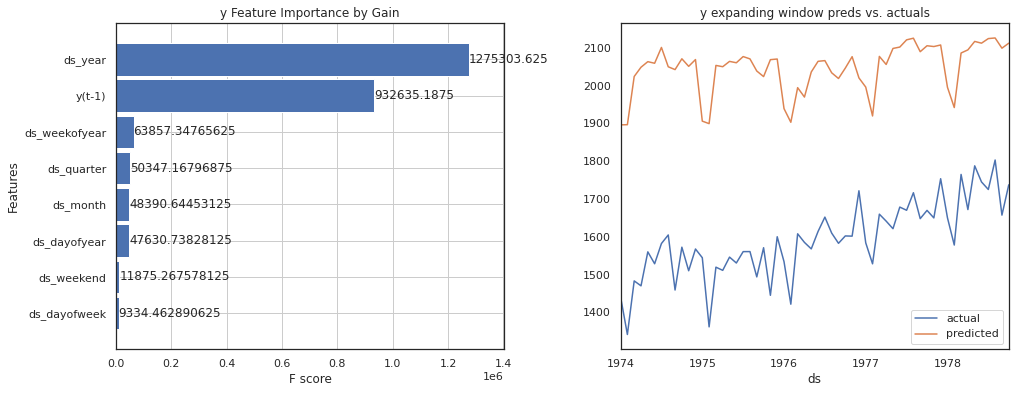

In [16]:
m1 = model_fit(df1,'Transportation Sector','BM',['prophet', 'stats', 'ARIMA', 'SARIMAX','ML'] )

Start of Fit.....
    Target variable given as = y
Start of loading of data.....
    Inputs: ts_column = ds, sep = ,, target = ['y']
    Using given input: pandas dataframe...
    ds column exists in given train data...
    train data shape = (578, 1)
    detected strf_time_format as %d-%b-%Y in train data. You can change it in setup if this is incorrect.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Data is stationary after one differencing
There is 1 differencing needed in this datasets for VAR model


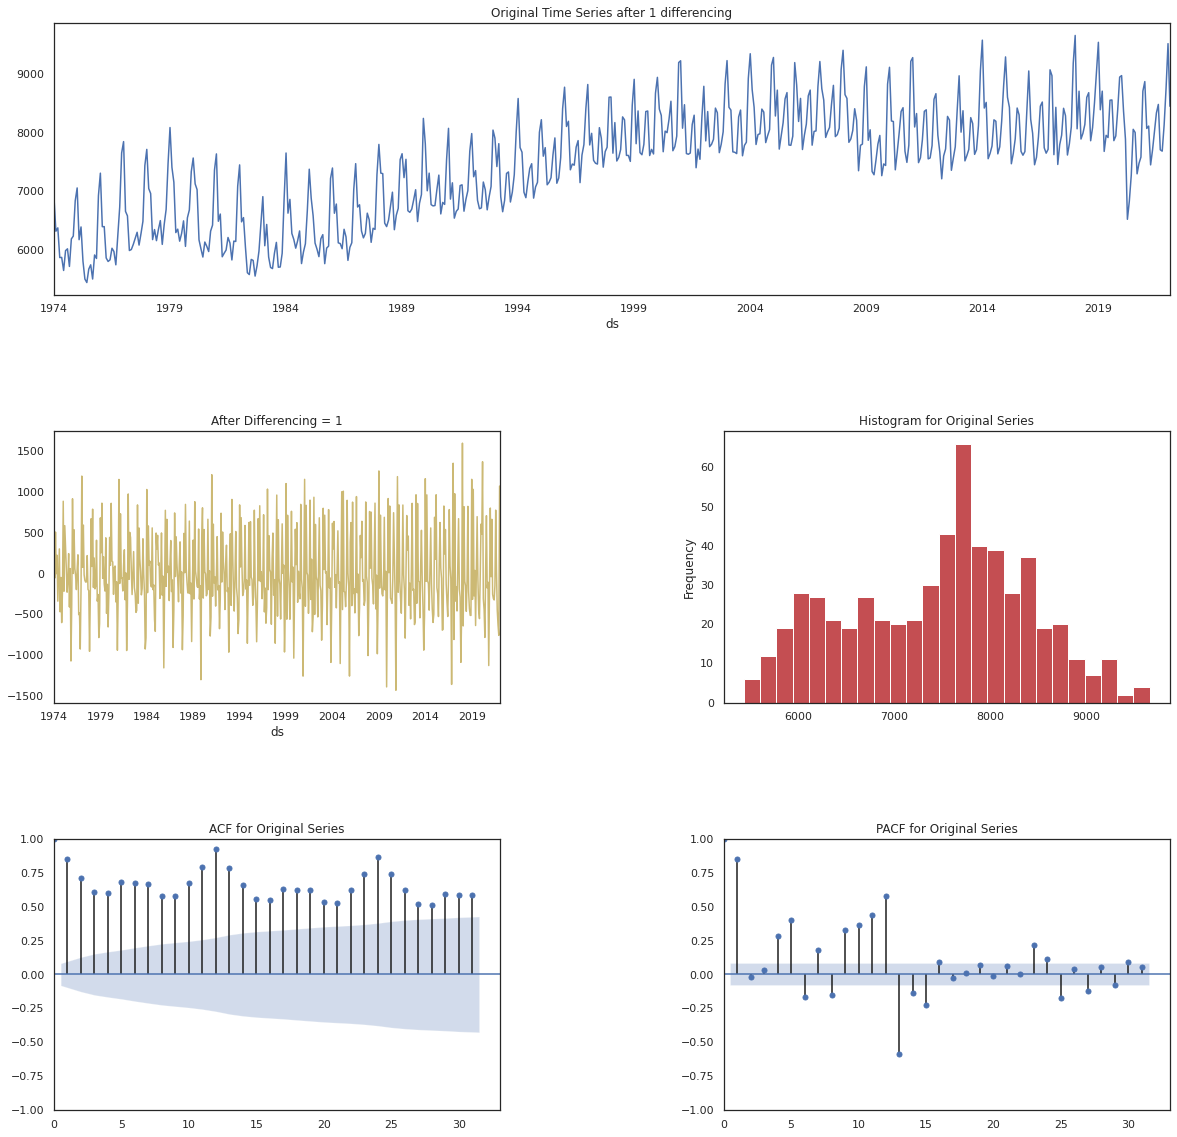

Time Interval is given as BM
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
    Fit-Predict data (shape=(578, 2)) with Confidence Interval = 0.95...
  Starting Prophet Fit
       Adding monthly seasonality to Prophet with period=12, fourier_order=12 and prior_scale=0.10
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 2

Fold Number: 1 --> Train Shape: 554 Test Shape: 12
    RMSE = 2,243.01
    Std Deviation of actuals = 517.49
    Normalized RMSE (as pct of std dev) = 433%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 566 Test Shape: 12
    RMSE = 2,068.05
    Std Deviation of actuals = 384.67
    Normalized RMSE (as pct of std dev) = 538%
Cross Validation window: 2 completed

-------------------------------------------
Model Cross Validation Results:
-------------------------------------------
    MAE (Mean Absolute Error = 2106

2022/07/17 10:27:27 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmpldknr_q5/model/model.pkl, flavor: sklearn), fall back to return ['scikit-learn==1.0.2', 'cloudpickle==2.1.0']. Set logging level to DEBUG to see the full traceback.


           name         rmse
1  auto_SARIMAX   260.953603
3            ML   962.801967
0       Prophet  2155.528803
2           VAR          inf


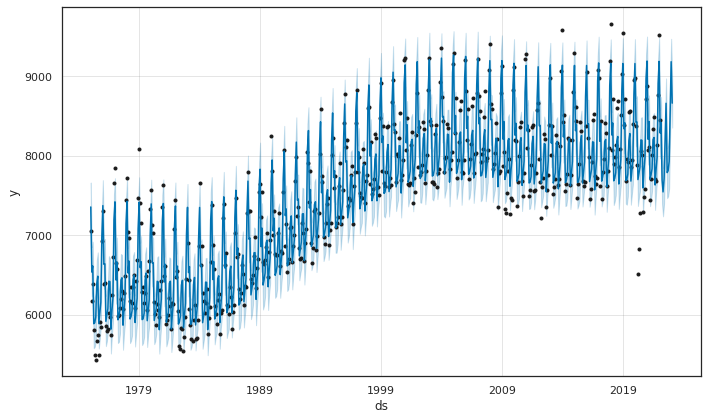

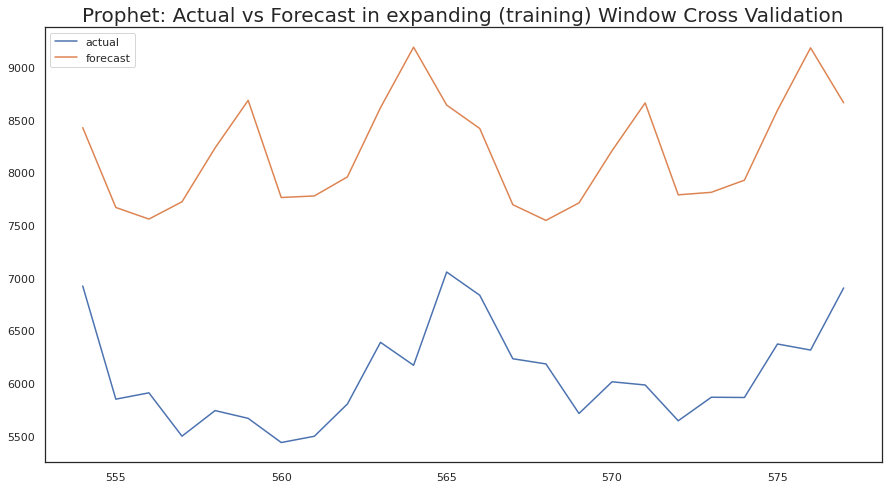

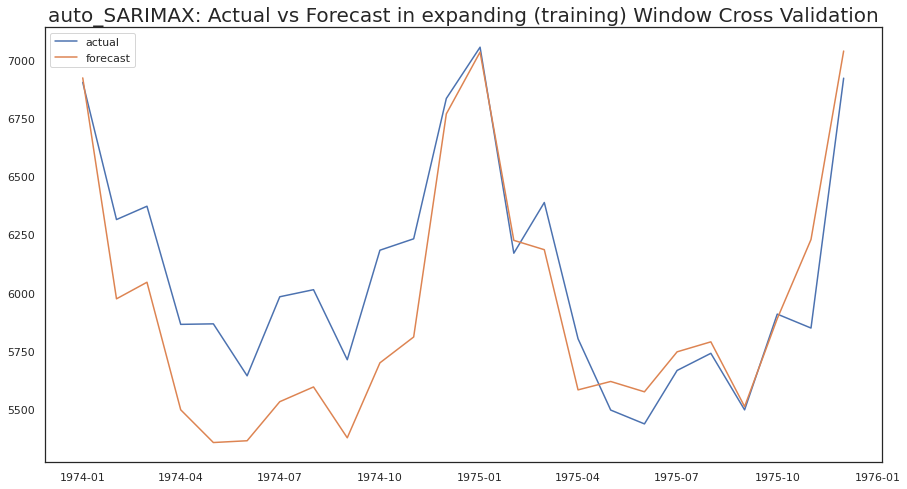

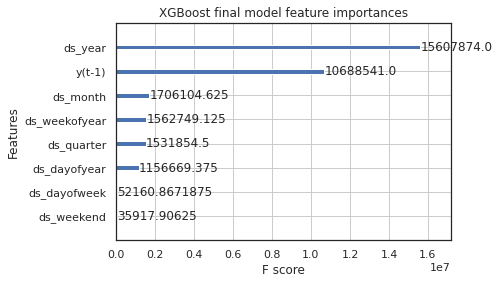

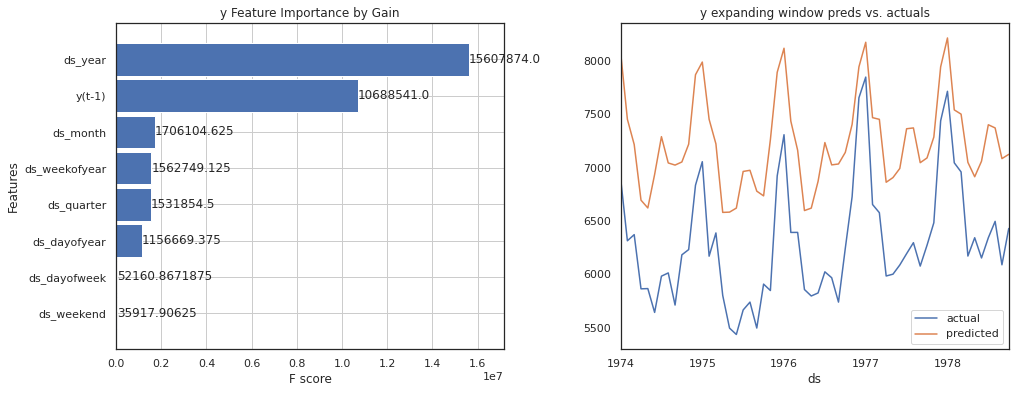

In [19]:
m2 = model_fit(df2,'Overall End-Use-Sectors','BM',['prophet', 'stats', 'ARIMA', 'SARIMAX','ML'])

Start of Fit.....
    Target variable given as = y
Start of loading of data.....
    Inputs: ts_column = ds, sep = ,, target = ['y']
    Using given input: pandas dataframe...
    ds column exists in given train data...
    train data shape = (578, 1)
    detected strf_time_format as %d-%b-%Y in train data. You can change it in setup if this is incorrect.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Data is stationary after one differencing
There is 1 differencing needed in this datasets for VAR model


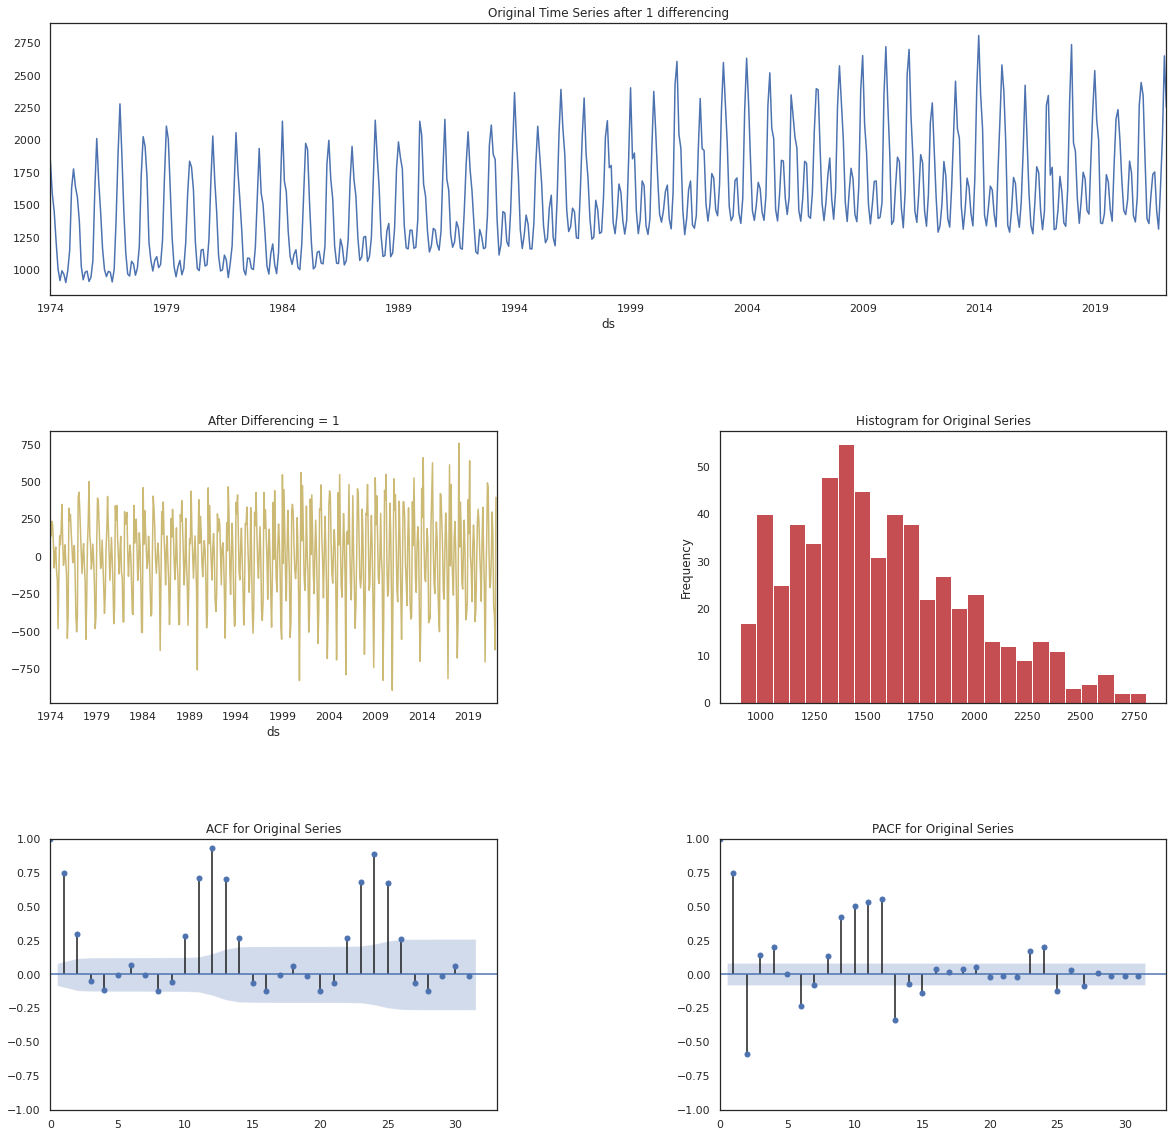

Time Interval is given as BM
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
    Fit-Predict data (shape=(578, 2)) with Confidence Interval = 0.95...
  Starting Prophet Fit
       Adding monthly seasonality to Prophet with period=12, fourier_order=12 and prior_scale=0.10
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 2

Fold Number: 1 --> Train Shape: 554 Test Shape: 12
    RMSE = 524.56
    Std Deviation of actuals = 317.85
    Normalized RMSE (as pct of std dev) = 165%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 566 Test Shape: 12


INFO:pyngrok.process.ngrok:t=2022-07-17T10:27:46+0000 lvl=info msg="join connections" obj=join id=a7f969e82aef l=127.0.0.1:5000 r=[2405:201:15:7851:d957:7fe3:3b1c:1812]:63570
INFO:pyngrok.process.ngrok:t=2022-07-17T10:27:46+0000 lvl=info msg="join connections" obj=join id=19d2e0540ad8 l=127.0.0.1:5000 r=[2405:201:15:7851:d957:7fe3:3b1c:1812]:63570
INFO:pyngrok.process.ngrok:t=2022-07-17T10:27:47+0000 lvl=info msg="join connections" obj=join id=4c08bb726f80 l=127.0.0.1:5000 r=[2405:201:15:7851:d957:7fe3:3b1c:1812]:63570


    RMSE = 531.47
    Std Deviation of actuals = 311.42
    Normalized RMSE (as pct of std dev) = 171%
Cross Validation window: 2 completed

-------------------------------------------
Model Cross Validation Results:
-------------------------------------------
    MAE (Mean Absolute Error = 500.21
    MSE (Mean Squared Error = 278809.57
    MAPE (Mean Absolute Percent Error) = 44%
    RMSE (Root Mean Squared Error) = 528.0242
    Normalized RMSE (MinMax) = 56%
    Normalized RMSE (as Std Dev of Actuals)= 164%
Time Taken = 6 seconds


INFO:pyngrok.process.ngrok:t=2022-07-17T10:27:47+0000 lvl=info msg="join connections" obj=join id=dec18ee5d970 l=127.0.0.1:5000 r=[2405:201:15:7851:d957:7fe3:3b1c:1812]:63570
INFO:pyngrok.process.ngrok:t=2022-07-17T10:27:47+0000 lvl=info msg="join connections" obj=join id=d663219d5739 l=127.0.0.1:5000 r=[2405:201:15:7851:d957:7fe3:3b1c:1812]:63570


  End of Prophet Fit


Building Auto SARIMAX Model



Running Auto SARIMAX Model...


Best Parameters:
p: None, d: None, q: None
P: None, D: None, Q: None
Seasonality: True
Seasonal Period: 12

Fold Number: 1 --> Train Shape: 554 Test Shape: 12

    Finding the best parameters using AutoArima:
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=7847.157, Time=0.05 sec


INFO:pyngrok.process.ngrok:t=2022-07-17T10:27:48+0000 lvl=info msg="join connections" obj=join id=6338019fbc07 l=127.0.0.1:5000 r=[2405:201:15:7851:d957:7fe3:3b1c:1812]:63570


 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=1.21 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=7416.405, Time=0.88 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=7845.159, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=7725.807, Time=0.24 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=7294.448, Time=2.60 sec


INFO:pyngrok.process.ngrok:t=2022-07-17T10:28:03+0000 lvl=info msg="join connections" obj=join id=be0a3814aafc l=127.0.0.1:5000 r=[2405:201:15:7851:d957:7fe3:3b1c:1812]:63570


 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=10.32 sec
 ARIMA(0,1,1)(0,0,3)[12] intercept   : AIC=7217.545, Time=6.43 sec


INFO:pyngrok.process.ngrok:t=2022-07-17T10:28:18+0000 lvl=info msg="join connections" obj=join id=97833cfcb5d2 l=127.0.0.1:5000 r=[2405:201:15:7851:d957:7fe3:3b1c:1812]:63570
INFO:pyngrok.process.ngrok:t=2022-07-17T10:28:33+0000 lvl=info msg="join connections" obj=join id=621b28f639e4 l=127.0.0.1:5000 r=[2405:201:15:7851:d957:7fe3:3b1c:1812]:63570
INFO:pyngrok.process.ngrok:t=2022-07-17T10:28:48+0000 lvl=info msg="join connections" obj=join id=4a51b98a7866 l=127.0.0.1:5000 r=[2405:201:15:7851:d957:7fe3:3b1c:1812]:63570


 ARIMA(0,1,1)(1,0,3)[12] intercept   : AIC=6910.705, Time=40.01 sec


INFO:pyngrok.process.ngrok:t=2022-07-17T10:29:03+0000 lvl=info msg="join connections" obj=join id=26e06778ea4d l=127.0.0.1:5000 r=[2405:201:15:7851:d957:7fe3:3b1c:1812]:63570


 ARIMA(0,1,1)(2,0,3)[12] intercept   : AIC=inf, Time=21.46 sec


INFO:pyngrok.process.ngrok:t=2022-07-17T10:29:18+0000 lvl=info msg="join connections" obj=join id=ba3679db9fd7 l=127.0.0.1:5000 r=[2405:201:15:7851:d957:7fe3:3b1c:1812]:63570


 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=inf, Time=11.37 sec


INFO:pyngrok.process.ngrok:t=2022-07-17T10:29:33+0000 lvl=info msg="join connections" obj=join id=080a944be6eb l=127.0.0.1:5000 r=[2405:201:15:7851:d957:7fe3:3b1c:1812]:63570


 ARIMA(0,1,0)(1,0,3)[12] intercept   : AIC=6882.598, Time=19.46 sec


INFO:pyngrok.process.ngrok:t=2022-07-17T10:29:48+0000 lvl=info msg="join connections" obj=join id=c3922a2edb93 l=127.0.0.1:5000 r=[2405:201:15:7851:d957:7fe3:3b1c:1812]:63570


 ARIMA(0,1,0)(0,0,3)[12] intercept   : AIC=7215.948, Time=6.21 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=6768.339, Time=4.43 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=7299.351, Time=1.79 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=6768.990, Time=1.85 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=2.09 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=7453.778, Time=0.50 sec


INFO:pyngrok.process.ngrok:t=2022-07-17T10:30:03+0000 lvl=info msg="join connections" obj=join id=64344338855b l=127.0.0.1:5000 r=[2405:201:15:7851:d957:7fe3:3b1c:1812]:63570


 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=8.80 sec
 ARIMA(0,1,0)(2,0,3)[12] intercept   : AIC=inf, Time=5.90 sec


INFO:pyngrok.process.ngrok:t=2022-07-17T10:30:18+0000 lvl=info msg="join connections" obj=join id=c9e322e0874d l=127.0.0.1:5000 r=[2405:201:15:7851:d957:7fe3:3b1c:1812]:63570


 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=11.66 sec
 ARIMA(0,1,0)(1,0,2)[12]             : AIC=6766.369, Time=2.48 sec
 ARIMA(0,1,0)(0,0,2)[12]             : AIC=7297.353, Time=1.32 sec
 ARIMA(0,1,0)(1,0,1)[12]             : AIC=6767.020, Time=0.55 sec
 ARIMA(0,1,0)(2,0,2)[12]             : AIC=6764.088, Time=3.90 sec
 ARIMA(0,1,0)(2,0,1)[12]             : AIC=6767.254, Time=3.17 sec
 ARIMA(0,1,0)(3,0,2)[12]             : AIC=6756.534, Time=11.77 sec
 ARIMA(0,1,0)(3,0,1)[12]             : AIC=6755.519, Time=5.26 sec
 ARIMA(0,1,0)(3,0,0)[12]             : AIC=inf, Time=1.21 sec
 ARIMA(0,1,0)(2,0,0)[12]             : AIC=inf, Time=0.57 sec
 ARIMA(1,1,0)(3,0,1)[12]             : AIC=inf, Time=8.10 sec
 ARIMA(0,1,1)(3,0,1)[12]             : AIC=inf, Time=nan sec
 ARIMA(1,1,1)(3,0,1)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,0)(3,0,1)[12] intercept   : AIC=inf, Time=8.76 sec

Best model:  ARIMA(0,1,0)(3,0,1)[12

2022/07/17 10:34:50 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmpl79zljk8/model/model.pkl, flavor: sklearn), fall back to return ['scikit-learn==1.0.2', 'cloudpickle==2.1.0']. Set logging level to DEBUG to see the full traceback.


           name        rmse
1  auto_SARIMAX   85.068627
3            ML  253.939666
0       Prophet  528.012912
2           VAR         inf


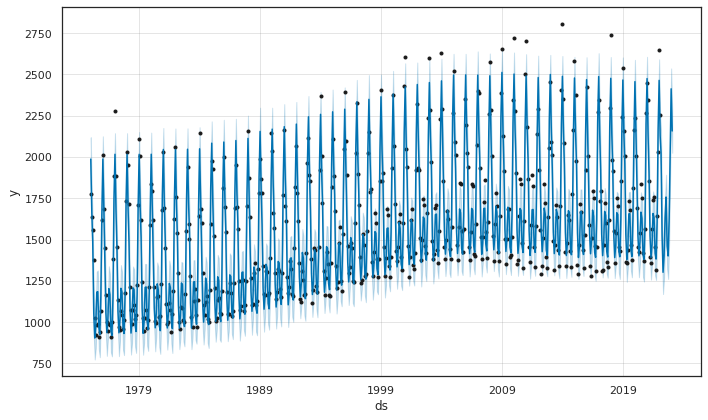

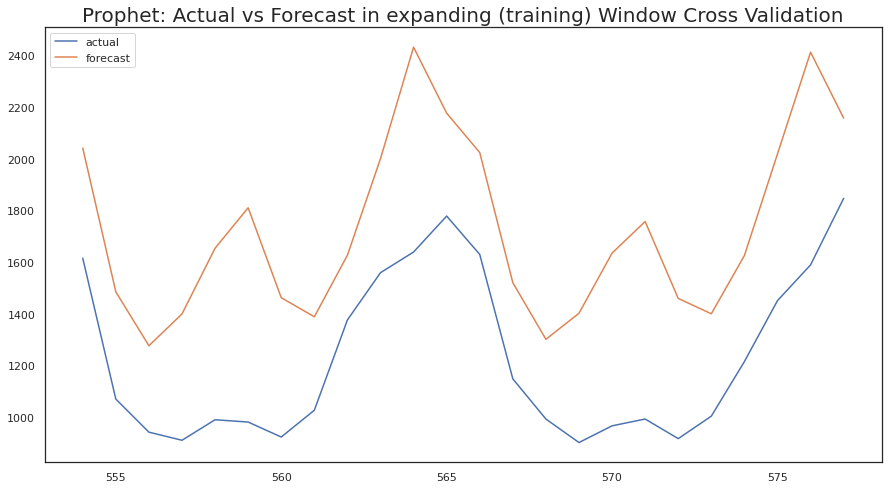

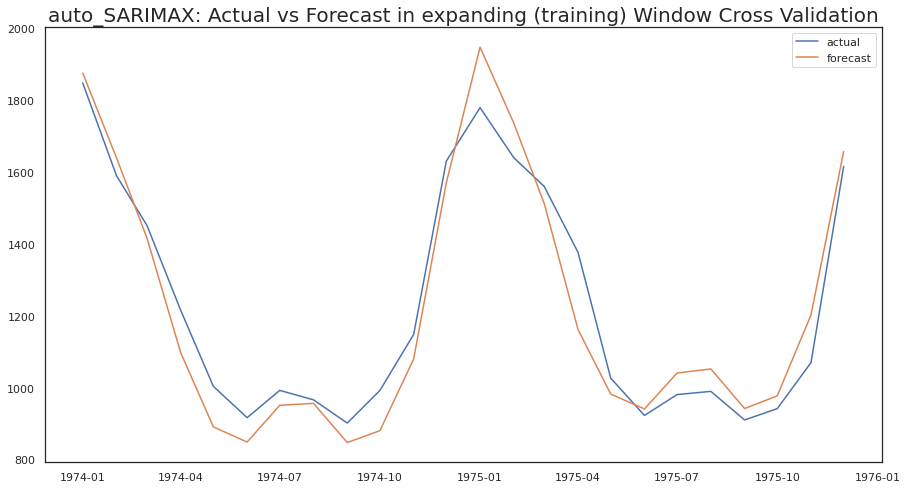

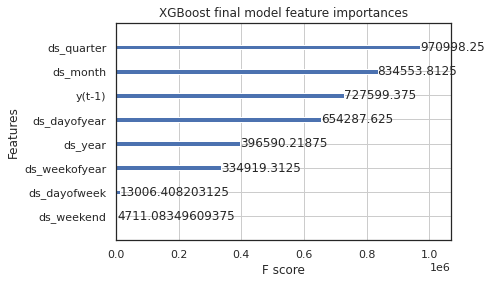

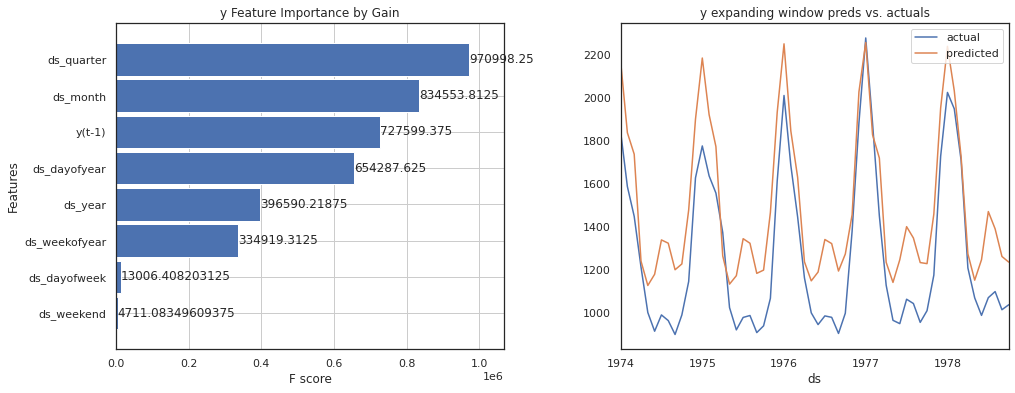

In [20]:
m3 = model_fit(df3,'Residential Sector','BM',['prophet', 'stats', 'ARIMA', 'SARIMAX','ML'])

Start of Fit.....
    Target variable given as = y
Start of loading of data.....
    Inputs: ts_column = ds, sep = ,, target = ['y']
    Using given input: pandas dataframe...
    ds column exists in given train data...
    train data shape = (578, 1)
    detected strf_time_format as %d-%b-%Y in train data. You can change it in setup if this is incorrect.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Data is already stationary
There is no differencing needed in this datasets for VAR model


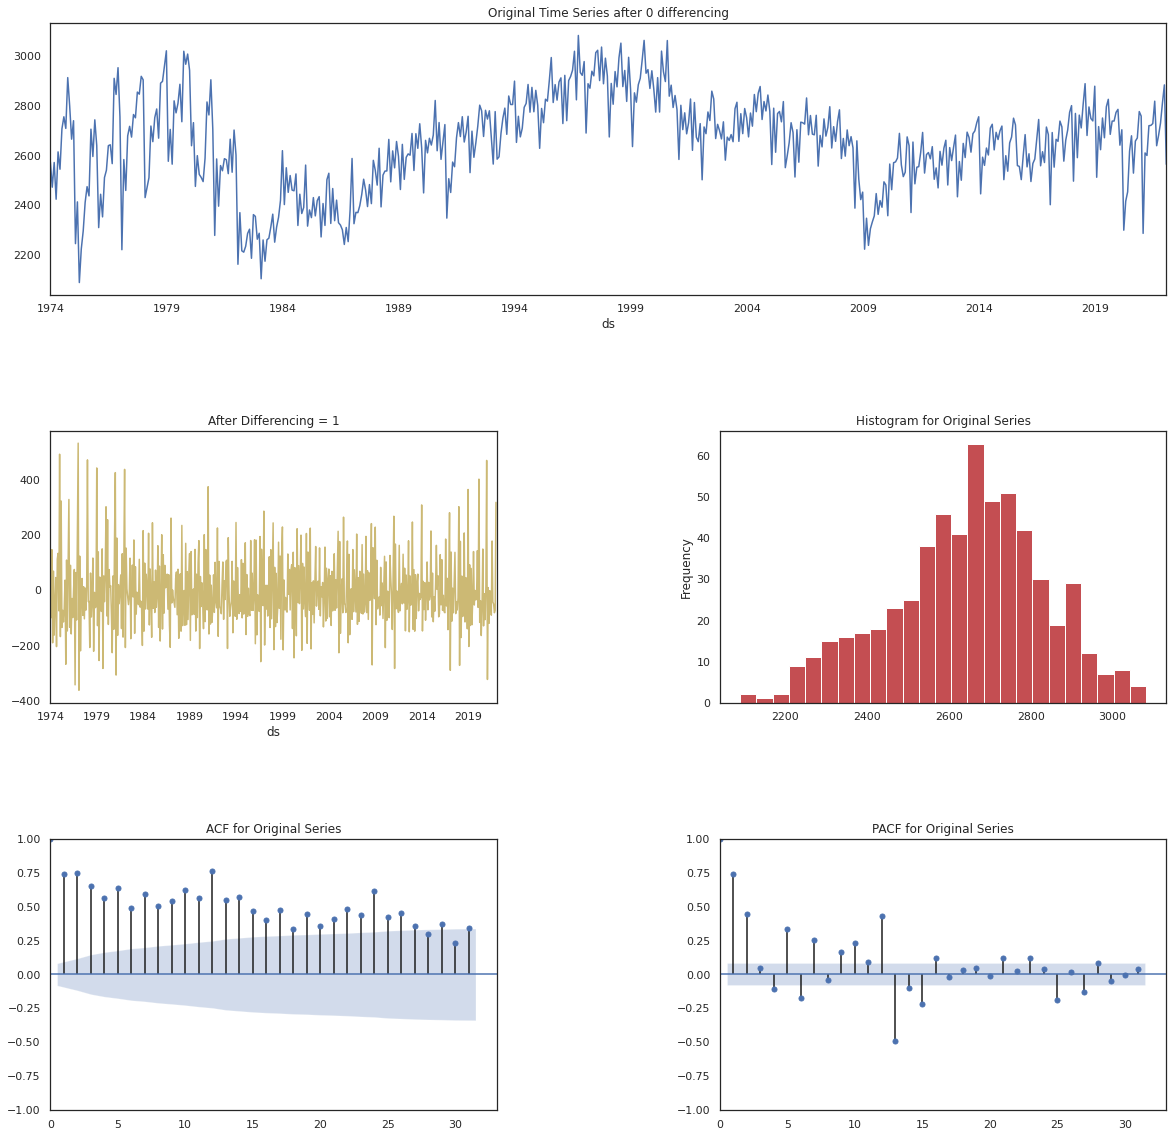

Time Interval is given as BM
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
    Fit-Predict data (shape=(578, 2)) with Confidence Interval = 0.95...
  Starting Prophet Fit
       Adding monthly seasonality to Prophet with period=12, fourier_order=12 and prior_scale=0.10
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 2

Fold Number: 1 --> Train Shape: 554 Test Shape: 12
    RMSE = 380.97
    Std Deviation of actuals = 205.16
    Normalized RMSE (as pct of std dev) = 186%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 566 Test Shape: 12
    RMSE = 200.81
    Std Deviation of actuals = 133.97
    Normalized RMSE (as pct of std dev) = 150%
Cross Validation window: 2 completed

-------------------------------------------
Model Cross Validation Results:
-------------------------------------------
    MAE (Mean Absolute Error = 244.72
 

INFO:pyngrok.process.ngrok:t=2022-07-17T10:44:45+0000 lvl=info msg="join connections" obj=join id=dbeb69aa6c70 l=127.0.0.1:5000 r=[2405:201:15:7851:d957:7fe3:3b1c:1812]:63657
INFO:pyngrok.process.ngrok:t=2022-07-17T10:44:46+0000 lvl=info msg="join connections" obj=join id=a8f808096f34 l=127.0.0.1:5000 r=[2405:201:15:7851:d957:7fe3:3b1c:1812]:63657
INFO:pyngrok.process.ngrok:t=2022-07-17T10:44:46+0000 lvl=info msg="join connections" obj=join id=0619f5b94b4d l=127.0.0.1:5000 r=[2405:201:15:7851:d957:7fe3:3b1c:1812]:63657
INFO:pyngrok.process.ngrok:t=2022-07-17T10:44:46+0000 lvl=info msg="join connections" obj=join id=485db0ca4a0e l=127.0.0.1:5000 r=[2405:201:15:7851:d957:7fe3:3b1c:1812]:63657
INFO:pyngrok.process.ngrok:t=2022-07-17T10:44:47+0000 lvl=info msg="join connections" obj=join id=1fd90b6ad538 l=127.0.0.1:5000 r=[2405:201:15:7851:d957:7fe3:3b1c:1812]:63657


 ARIMA(1,1,3)(2,0,2)[12] intercept   : AIC=inf, Time=21.18 sec
 ARIMA(2,1,3)(1,0,1)[12] intercept   : AIC=6601.279, Time=3.67 sec


INFO:pyngrok.process.ngrok:t=2022-07-17T10:45:01+0000 lvl=info msg="join connections" obj=join id=1f4b589b4d8f l=127.0.0.1:5000 r=[2405:201:15:7851:d957:7fe3:3b1c:1812]:63657


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=5.66 sec
 ARIMA(1,1,3)(1,0,1)[12]             : AIC=6557.180, Time=4.72 sec
 ARIMA(1,1,3)(0,0,1)[12]             : AIC=6905.390, Time=1.06 sec
 ARIMA(1,1,3)(1,0,0)[12]             : AIC=6698.585, Time=0.86 sec


INFO:pyngrok.process.ngrok:t=2022-07-17T10:45:16+0000 lvl=info msg="join connections" obj=join id=5d6938df3ee7 l=127.0.0.1:5000 r=[2405:201:15:7851:d957:7fe3:3b1c:1812]:63657


 ARIMA(1,1,3)(2,0,1)[12]             : AIC=inf, Time=9.82 sec
 ARIMA(1,1,3)(1,0,2)[12]             : AIC=inf, Time=9.29 sec
 ARIMA(1,1,3)(0,0,0)[12]             : AIC=7130.365, Time=0.34 sec


INFO:pyngrok.process.ngrok:t=2022-07-17T10:45:31+0000 lvl=info msg="join connections" obj=join id=b905730ed09f l=127.0.0.1:5000 r=[2405:201:15:7851:d957:7fe3:3b1c:1812]:63657


 ARIMA(1,1,3)(0,0,2)[12]             : AIC=6796.525, Time=4.18 sec
 ARIMA(1,1,3)(2,0,0)[12]             : AIC=6628.749, Time=2.70 sec


INFO:pyngrok.process.ngrok:t=2022-07-17T10:45:46+0000 lvl=info msg="join connections" obj=join id=f65819a74468 l=127.0.0.1:5000 r=[2405:201:15:7851:d957:7fe3:3b1c:1812]:63657
INFO:pyngrok.process.ngrok:t=2022-07-17T10:46:01+0000 lvl=info msg="join connections" obj=join id=d800b1d59a30 l=127.0.0.1:5000 r=[2405:201:15:7851:d957:7fe3:3b1c:1812]:63657


 ARIMA(1,1,3)(2,0,2)[12]             : AIC=inf, Time=30.84 sec
 ARIMA(0,1,3)(1,0,1)[12]             : AIC=6593.606, Time=3.03 sec
 ARIMA(1,1,2)(1,0,1)[12]             : AIC=6574.710, Time=3.12 sec


INFO:pyngrok.process.ngrok:t=2022-07-17T10:46:16+0000 lvl=info msg="join connections" obj=join id=1dbe80cadd6b l=127.0.0.1:5000 r=[2405:201:15:7851:d957:7fe3:3b1c:1812]:63657


 ARIMA(2,1,3)(1,0,1)[12]             : AIC=6587.640, Time=7.60 sec
 ARIMA(0,1,2)(1,0,1)[12]             : AIC=6560.286, Time=3.93 sec
 ARIMA(2,1,2)(1,0,1)[12]             : AIC=inf, Time=1.76 sec

Best model:  ARIMA(1,1,3)(1,0,1)[12]          
Total fit time: 339.077 seconds

Best model is a Seasonal SARIMAX(1,1,3)*(1,0,1,12), aic = 6557.180
Refitting data with previously found best parameters
    Best aic metric = 6536.8
                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  578
Model:             SARIMAX(1, 1, 3)x(1, 0, [1], 12)   Log Likelihood               -3259.418
Date:                              Sun, 17 Jul 2022   AIC                           6536.836
Time:                                      10:46:30   BIC                           6575.804
Sample:                                           0   HQIC                          6552.051
                

INFO:pyngrok.process.ngrok:t=2022-07-17T10:46:31+0000 lvl=info msg="join connections" obj=join id=4e9cd84245b2 l=127.0.0.1:5000 r=[2405:201:15:7851:d957:7fe3:3b1c:1812]:63657


Cross-validated Score = 243.375 in num rounds = 249
Time taken for Hyper Param tuning of XGBoost (in minutes) = 0.2
Top 10 features:
['y(t-1)', 'ds_year', 'ds_dayofyear', 'ds_month', 'ds_weekofyear', 'ds_quarter', 'ds_dayofweek', 'ds_weekend']
    Time taken for training XGBoost on entire train data (in minutes) = 0.3
Returning the following:
    Model = <xgboost.core.Booster object at 0x7fde844e53d0>
    Scaler = Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('simpleimputer',
                                                  SimpleImputer(),
                                                  ['y(t-1)', 'ds_hour',
                                                   'ds_minute', 'ds_dayofweek',
                                                   'ds_quarter', 'ds_month',
                                                   'ds_year', 'ds_dayofyear',
                                                   'ds_dayofmonth',
                                   

INFO:pyngrok.process.ngrok:t=2022-07-17T10:46:46+0000 lvl=info msg="join connections" obj=join id=9b4e7f81cc1a l=127.0.0.1:5000 r=[2405:201:15:7851:d957:7fe3:3b1c:1812]:63657
2022/07/17 10:46:50 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmplk287ri8/model/model.pkl, flavor: sklearn), fall back to return ['scikit-learn==1.0.2', 'cloudpickle==2.1.0']. Set logging level to DEBUG to see the full traceback.


           name        rmse
1  auto_SARIMAX  129.685739
3            ML  204.284608
0       Prophet  290.890848
2           VAR         inf


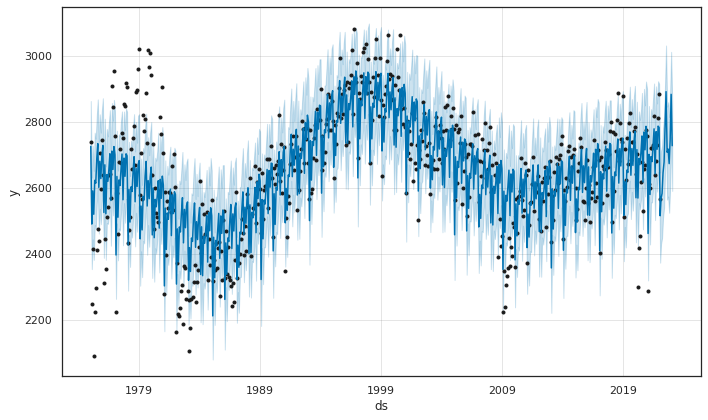

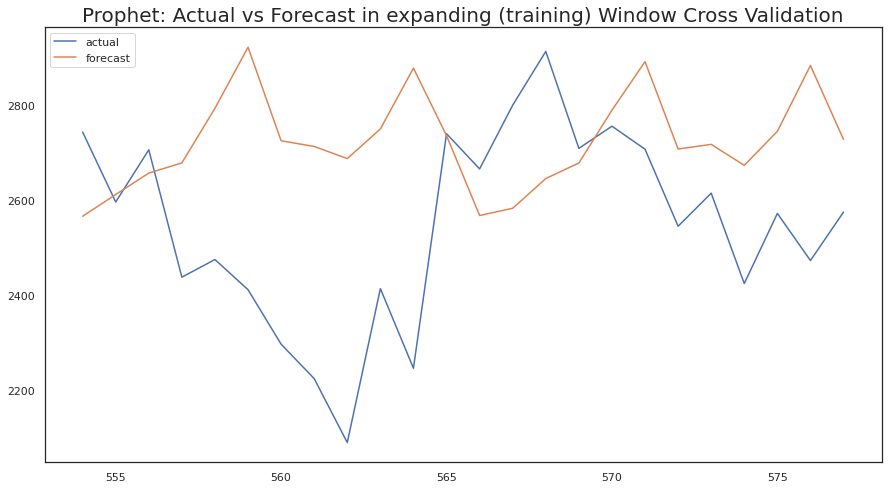

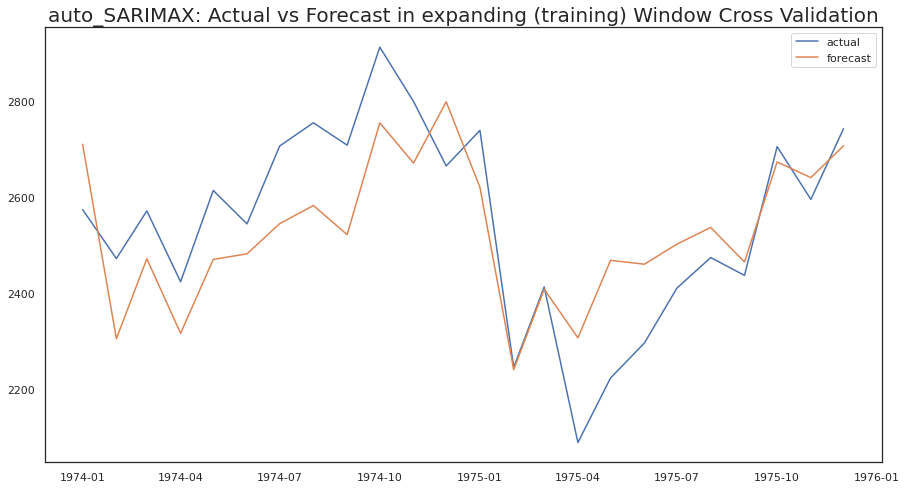

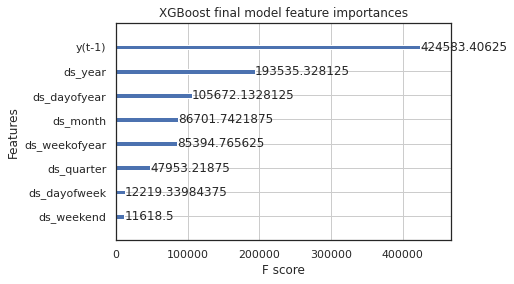

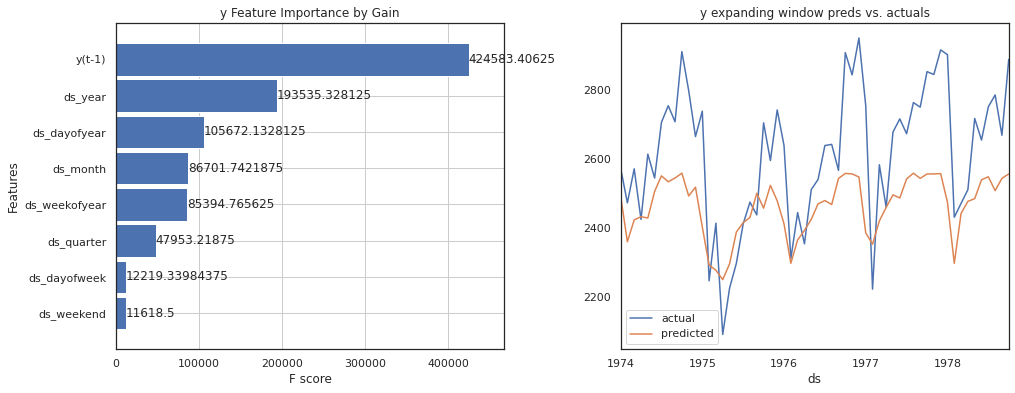

In [21]:
m4 = model_fit(df4, 'Industrial Sector','BM',['prophet', 'stats', 'ARIMA', 'SARIMAX','ML'])

Start of Fit.....
    Target variable given as = y
Start of loading of data.....
    Inputs: ts_column = ds, sep = ,, target = ['y']
    Using given input: pandas dataframe...
    ds column exists in given train data...
    train data shape = (578, 1)
    detected strf_time_format as %d-%b-%Y in train data. You can change it in setup if this is incorrect.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Data is stationary after one differencing
There is 1 differencing needed in this datasets for VAR model


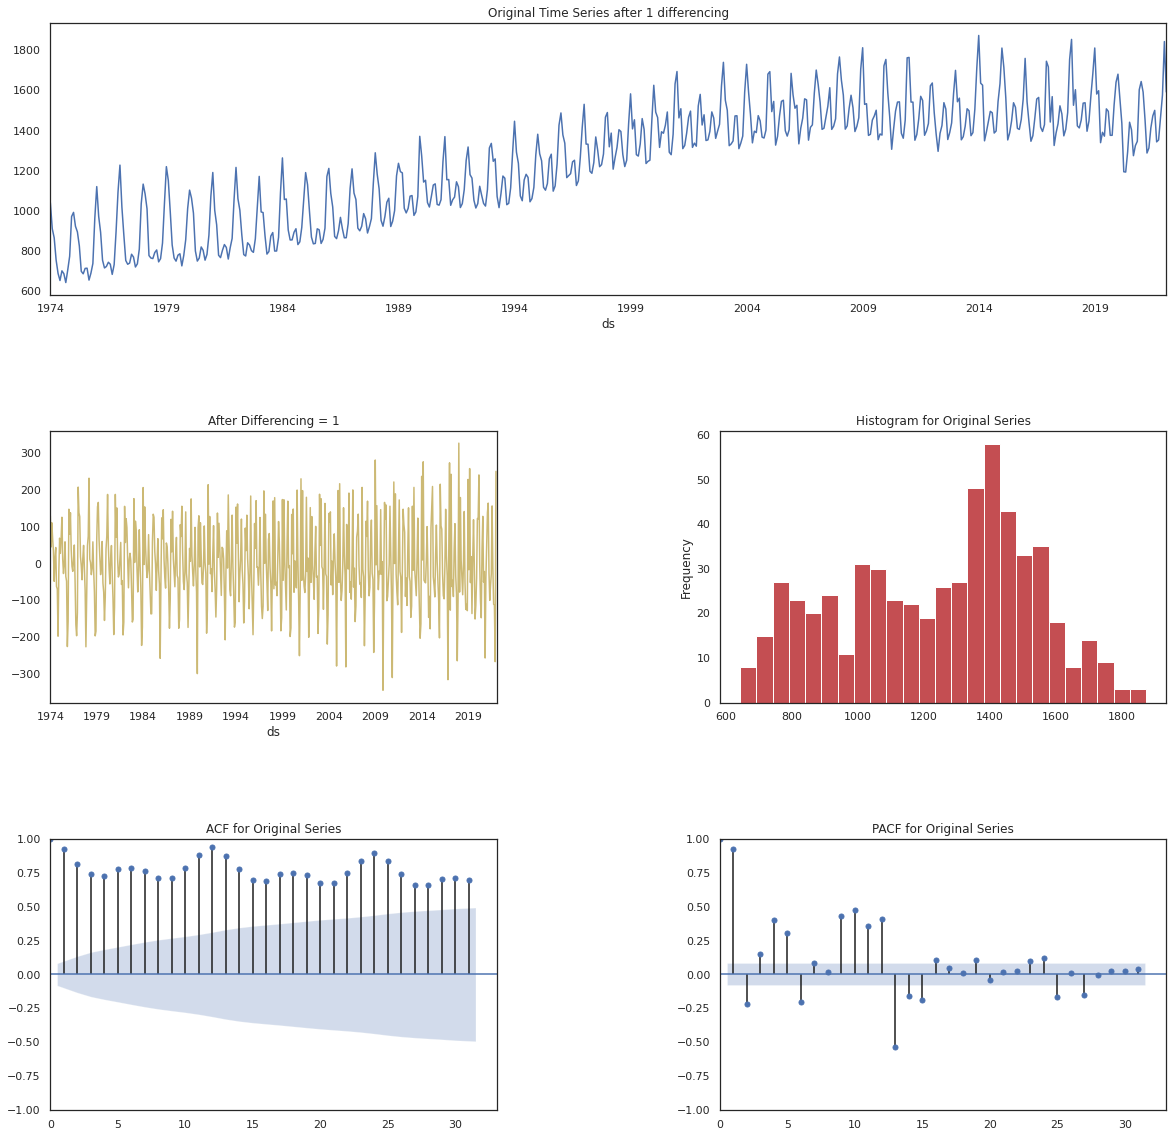

Time Interval is given as BM
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
    Fit-Predict data (shape=(578, 2)) with Confidence Interval = 0.95...
  Starting Prophet Fit
       Adding monthly seasonality to Prophet with period=12, fourier_order=12 and prior_scale=0.10
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 2

Fold Number: 1 --> Train Shape: 554 Test Shape: 12
    RMSE = 689.37
    Std Deviation of actuals = 116.33
    Normalized RMSE (as pct of std dev) = 593%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 566 Test Shape: 12
    RMSE = 693.37
    Std Deviation of actuals = 127.00
    Normalized RMSE (as pct of std dev) = 546%
Cross Validation window: 2 completed

-------------------------------------------
Model Cross Validation Results:
-------------------------------------------
    MAE (Mean Absolute Error = 686.60
 

INFO:pyngrok.process.ngrok:t=2022-07-17T11:05:27+0000 lvl=info msg="join connections" obj=join id=23dc68c5ec46 l=127.0.0.1:5000 r=[2405:201:15:7851:d957:7fe3:3b1c:1812]:63819
INFO:pyngrok.process.ngrok:t=2022-07-17T11:05:27+0000 lvl=info msg="join connections" obj=join id=180661c25d77 l=127.0.0.1:5000 r=[2405:201:15:7851:d957:7fe3:3b1c:1812]:63819
INFO:pyngrok.process.ngrok:t=2022-07-17T11:05:28+0000 lvl=info msg="join connections" obj=join id=afd0459f94a5 l=127.0.0.1:5000 r=[2405:201:15:7851:d957:7fe3:3b1c:1812]:63819
INFO:pyngrok.process.ngrok:t=2022-07-17T11:05:28+0000 lvl=info msg="join connections" obj=join id=4c2054a72839 l=127.0.0.1:5000 r=[2405:201:15:7851:d957:7fe3:3b1c:1812]:63819
INFO:pyngrok.process.ngrok:t=2022-07-17T11:05:28+0000 lvl=info msg="join connections" obj=join id=68ddfe9d43c4 l=127.0.0.1:5000 r=[2405:201:15:7851:d957:7fe3:3b1c:1812]:63819


 ARIMA(0,1,1)(3,0,1)[12] intercept   : AIC=5905.095, Time=16.77 sec
 ARIMA(0,1,1)(3,0,0)[12] intercept   : AIC=5995.718, Time=9.56 sec
 ARIMA(0,1,1)(3,0,2)[12] intercept   : AIC=inf, Time=19.29 sec
 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=6458.320, Time=2.15 sec


INFO:pyngrok.process.ngrok:t=2022-07-17T11:06:13+0000 lvl=info msg="join connections" obj=join id=1eb8f7681a51 l=127.0.0.1:5000 r=[2405:201:15:7851:d957:7fe3:3b1c:1812]:63827


 ARIMA(0,1,0)(3,0,1)[12] intercept   : AIC=6039.507, Time=12.82 sec
 ARIMA(1,1,1)(3,0,1)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,1,2)(3,0,1)[12] intercept   : AIC=inf, Time=16.53 sec
 ARIMA(1,1,0)(3,0,1)[12] intercept   : AIC=inf, Time=12.11 sec
 ARIMA(1,1,2)(3,0,1)[12] intercept   : AIC=inf, Time=18.63 sec
 ARIMA(0,1,1)(3,0,1)[12]             : AIC=inf, Time=nan sec

Best model:  ARIMA(0,1,1)(3,0,1)[12] intercept
Total fit time: 145.314 seconds

Best model is a Seasonal SARIMAX(0,1,1)*(3,0,1,12), aic = 5905.095
Static Forecasts:
    RMSE = 40.17
    Std Deviation of Actuals = 127.00
    Normalized RMSE (as pct of std dev) = 31.6%

SARIMAX RMSE (all folds): 45.1268
SARIMAX Norm RMSE (all folds): 16%


-------------------------------------------
Model Cross Validation Results:
-------------------------------------------
    MAE (Mean Absolute Error = 37.26
    MSE (Mean Squared Error = 2060.95
    MAPE (Mean Absolute Percent Error) = 5%
    RMSE (Root Mean Squared Error) = 45.3

2022/07/17 11:10:44 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmp5_5k4uc8/model/model.pkl, flavor: sklearn), fall back to return ['scikit-learn==1.0.2', 'cloudpickle==2.1.0']. Set logging level to DEBUG to see the full traceback.


           name        rmse
1  auto_SARIMAX   45.126833
3            ML  418.442435
0       Prophet  691.372400
2           VAR         inf


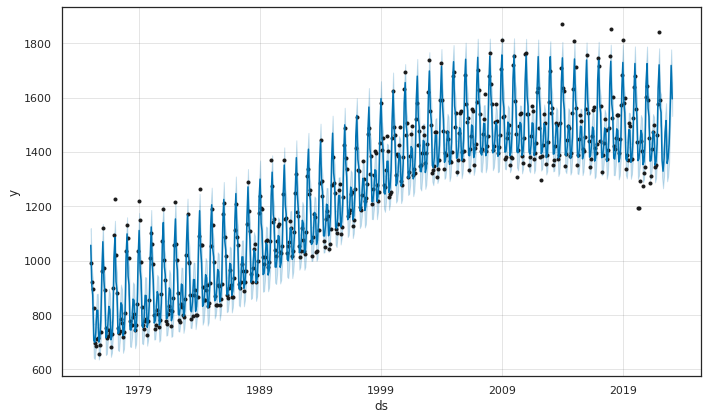

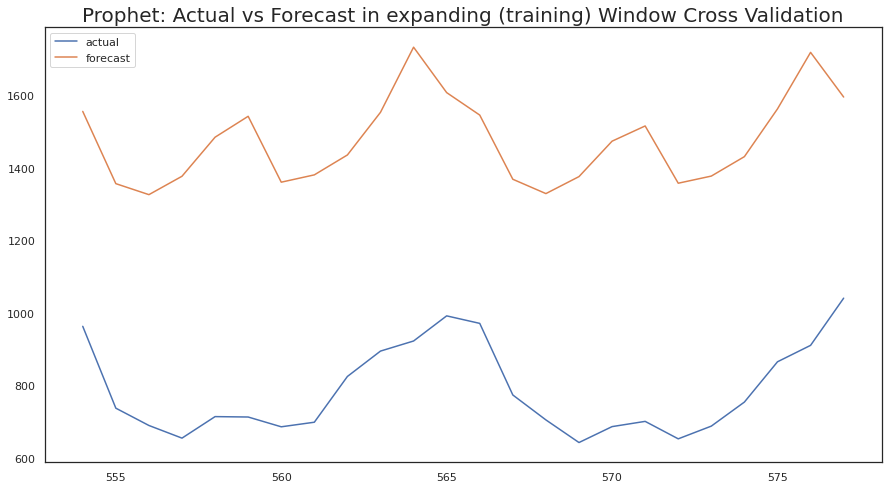

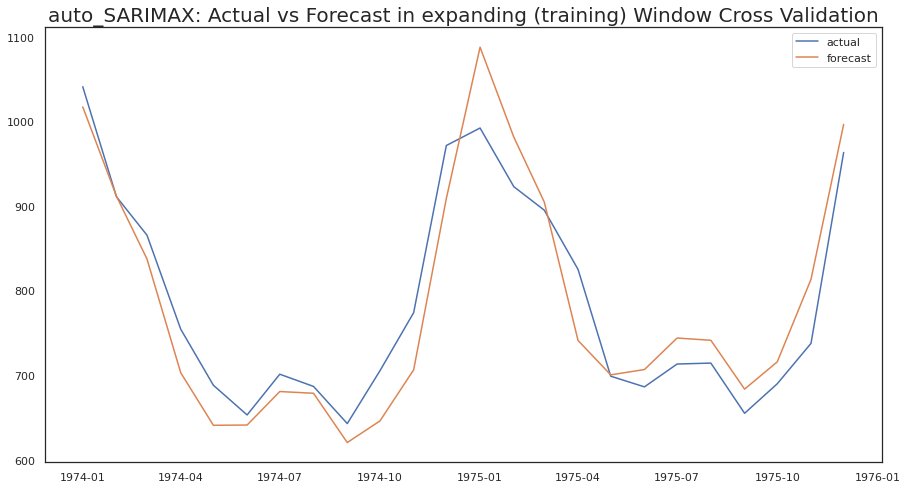

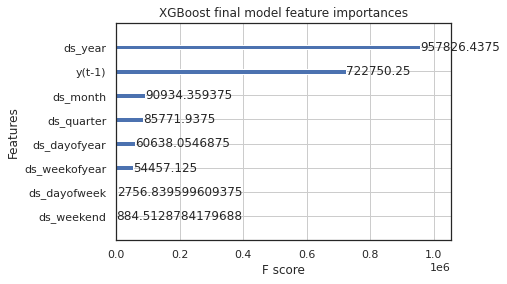

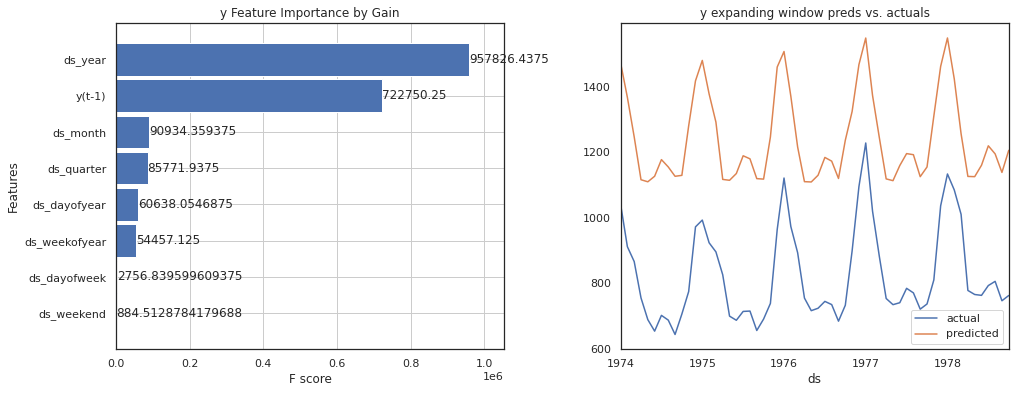

In [23]:
m5 = model_fit(df5,'Commercial Sector','BM',['prophet', 'stats', 'ARIMA', 'SARIMAX','ML'])

In [17]:
get_ipython().system_raw("mlflow ui --port 5000 &")

In [18]:
!pip install pyngrok --quiet
from pyngrok import ngrok

# Terminate open tunnels if exist
ngrok.kill()

# Setting the authtoken (optional)
# Get your authtoken from https://dashboard.ngrok.com/auth
NGROK_AUTH_TOKEN = "2BylS2NbyDk4L9pkimiB9JzFqi1_7rsno8kULvqwwMECWU1cA"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTPs tunnel on port 5000 for http://localhost:5000
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("MLflow Tracking UI:", ngrok_tunnel.public_url)

INFO:pyngrok.process:Updating authtoken for default "config_path" of "ngrok_path": /usr/local/lib/python3.7/dist-packages/pyngrok/bin/ngrok
INFO:pyngrok.ngrok:Opening tunnel named: http-5000-db90b483-e38e-4e13-bcd2-16505b0b69ba
INFO:pyngrok.process.ngrok:t=2022-07-17T10:12:18+0000 lvl=info msg="no configuration paths supplied"
INFO:pyngrok.process.ngrok:t=2022-07-17T10:12:18+0000 lvl=info msg="using configuration at default config path" path=/root/.ngrok2/ngrok.yml
INFO:pyngrok.process.ngrok:t=2022-07-17T10:12:18+0000 lvl=info msg="open config file" path=/root/.ngrok2/ngrok.yml err=nil
INFO:pyngrok.process.ngrok:t=2022-07-17T10:12:18+0000 lvl=info msg="starting web service" obj=web addr=127.0.0.1:4040
INFO:pyngrok.process.ngrok:t=2022-07-17T10:12:18+0000 lvl=info msg="tunnel session started" obj=tunnels.session
INFO:pyngrok.process.ngrok:t=2022-07-17T10:12:18+0000 lvl=info msg="client session established" obj=csess id=3de649118d48
INFO:pyngrok.process.ngrok:t=2022-07-17T10:12:18+0000 l

MLflow Tracking UI: https://2858-35-237-109-57.ngrok.io


INFO:pyngrok.process.ngrok:t=2022-07-17T10:12:18+0000 lvl=info msg="started tunnel" obj=tunnels name=http-5000-db90b483-e38e-4e13-bcd2-16505b0b69ba addr=http://localhost:5000 url=https://2858-35-237-109-57.ngrok.io
INFO:pyngrok.process.ngrok:t=2022-07-17T10:12:18+0000 lvl=info msg=end pg=/api/tunnels id=53b51ddb8ffeff36 status=201 dur=41.864513ms
